In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter

C:\Users\Andreas\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Andreas\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Andreas\anaconda3\lib\site-packages\numpy\.libs\libopenblas.noijjg62emaszi6nyurl6jbkm4evbgm7.gfortran-win_amd64.dll
C:\Users\Andreas\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df = pd.read_csv("../datasets/author_metrics.csv")

In [8]:
df = df.fillna(0)

In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]



## Find optimal amount of centroids for k-means clustering

In [15]:
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=42
)
y_km = km.fit_predict(df[["outdeg%","indeg%","bin","thbi","pr","spth","th","mpth","mean_karma"]])

In [17]:
counter = Counter(y_km)

In [18]:
# Cluster sizes for 4 centroids

counter

Counter({0: 1589735, 3: 9288, 1: 2, 2: 1})

In [12]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15))

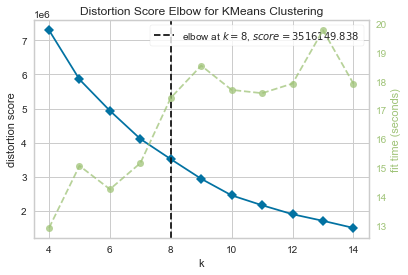

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
visualizer.fit(df[["outdeg%","indeg%","bin","thbi","pr","spth","th","mpth"]])  # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [14]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=8, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=42
)
y_km = km.fit_predict(df[["outdeg%","indeg%","bin","thbi","pr","spth","th","mpth"]]) 

## Evaluate results of k-means clustering by assigning user roles based on findings of Morrison et al

In [20]:
counter = Counter(y_km)

In [21]:
# Cluster sizes with 8 centroids and with excluding karma and entropy

counter

Counter({5: 1512872, 0: 83355, 3: 1824, 6: 935, 7: 37, 4: 1, 2: 1, 1: 1})

In [18]:
df_clusters = df.assign(clusters=y_km)


In [46]:
df_clusters

,author,author_fullname,mean_karma,th,mpth,spth,pr,bin,thbi,entropy,indeg%,outdeg%,clusters
0,fixthismess,t2_fnnaj,1.0,0.000000,1.000000,0.000000,0.153846,0.000000,0.000000,0.181818,0.001040,0.001387,5
1,seravivi,t2_148x1q,1.0,0.000000,2.400000,3.130495,0.416667,0.166667,0.200000,0.090909,0.001332,0.002663,0
2,SillySundae,t2_13722gob,1.0,0.000000,1.666667,1.118034,0.200000,0.083333,0.111111,0.363636,0.000103,0.000617,5
3,GreyTartanTee,t2_bxckb6oc,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000781,5
4,Magdalan,t2_12yrq8,1.0,0.000000,2.073529,2.300656,0.333333,0.144000,0.220588,0.363636,0.001677,0.003271,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599021,Husklik,t2_hm2edcrx,0.0,0.000345,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,5
1599022,jackson01105,t2_cjr1ikd2,0.0,0.000345,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,5
1599023,LocksmithOk9368,t2_akltk5pq,0.0,0.000345,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,5
1599024,kingmaster12345,t2_qoxvq11h,0.0,0.000345,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,5


In [43]:
columns = ["th","mpth" ,"spth", "pr","bin","thbi", "indeg%", "outdeg%","mean_karma"]
clusters = [0,3,5,7,6]

In [47]:
for j in clusters:
    df_clusters_filtered = df_clusters[df_clusters["clusters"] == j]
    result = ""
    for i in columns:
        result += "  " + i + "\t" +str(round(df_clusters_filtered[i].mean(),4)) + "  "  + "&"
    print(result)
    print(len(df_clusters_filtered), j)

  th	0.0007  &  mpth	4.07  &  spth	2.7271  &  pr	0.5124  &  bin	0.3151  &  thbi	0.2621  &  indeg%	0.0956  &  outdeg%	0.0498  &  mean_karma	1.0025  &
83355 0
  th	0.0014  &  mpth	14.2301  &  spth	24.7463  &  pr	0.5472  &  bin	0.3067  &  thbi	0.3771  &  indeg%	0.1405  &  outdeg%	0.0631  &  mean_karma	1.0018  &
1824 3
  th	0.0001  &  mpth	1.0839  &  spth	0.1565  &  pr	0.218  &  bin	0.103  &  thbi	0.0559  &  indeg%	0.0261  &  outdeg%	0.0128  &  mean_karma	0.9347  &
1512872 5
  th	0.0014  &  mpth	89.6842  &  spth	172.2219  &  pr	0.5347  &  bin	0.2455  &  thbi	0.4463  &  indeg%	0.3139  &  outdeg%	0.1427  &  mean_karma	1.0204  &
37 7
  th	0.0003  &  mpth	35.092  &  spth	0.0739  &  pr	0.561  &  bin	0.3412  &  thbi	0.0593  &  indeg%	0.4421  &  outdeg%	0.2202  &  mean_karma	1.0013  &
935 6


In [ ]:
highest combination of spth, pr, ent, ind, outdeg -> contributor

3,7+ spth
0,6 ,3,7, pr
6++,5,7+ indeg
6++,7 + outdeg

=> 7 oder 6

highest mpth (high engagement) and lowest bin & thbi -> Ignored

6+, 7 ++, 3 mpth
5++, 7+  low bin
5,6 low thbi

5 viel zu low im mpth
=> 6 (1045)

lowest mpth (low engagement) -> Lurker

0 oder 5+

medium engagement and high reciprocity -> casual_commentator
engagement (mpth, spth), reciprocity (pr, bin, thbi)

mpth medium -> 0,3,6
spth medium -> 0,3
high pr -> 6+, 7,3,0
high bin -> 6+, 3,0
high thbi -> 7++,3+,0

=> 3 + 0 

## Test correlation of the used metrics

In [54]:
correlation_matrix = df[["th","mpth" ,"spth", "pr","bin","thbi", "indeg%", "outdeg%","mean_karma","entropy"]].corr() #,"entropy"

In [55]:
import seaborn as sn
import matplotlib.pyplot as plt

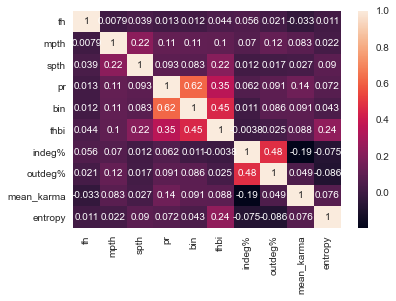

In [56]:
sn.heatmap(correlation_matrix, annot=True)
plt.show()

## Extract user groups by decision rules

In [79]:
df_std = df[["th","mpth" ,"spth", "pr","bin","thbi", "indeg%", "outdeg%","mean_karma","entropy"]].std()

In [63]:
df_average = df[["th","mpth" ,"spth", "pr","bin","thbi", "indeg%", "outdeg%","mean_karma","entropy"]].mean()

In [64]:
# Extract Contributors by high combination of spth, pr, indeg, outdeg

contributor = df[(df["spth"] > df_average["spth"]) & (df["pr"] > df_average["pr"]) & (df["indeg%"] > df_average["indeg%"]) & (df["outdeg%"] > df_average["outdeg%"]) ]

In [65]:
contributor

,author,author_fullname,mean_karma,th,mpth,spth,pr,bin,thbi,entropy,indeg%,outdeg%
38,MeandMyPelvicfloor,t2_4p55gpjn,1.0,0.000000,2.500000,2.121320,0.600000,0.333333,0.500000,0.181818,0.043478,0.130435
100,Overall-Blood1940,t2_a1w3dzzx,1.0,0.003451,3.142857,2.035401,0.454545,0.272727,0.636364,0.181818,0.764706,0.294118
146,Ichewthecereal,t2_k90ih,1.0,0.000345,2.500000,2.121320,0.800000,1.000000,0.500000,0.181818,0.500000,0.300000
299,lethreauxaweigh,t2_3yt9oapp,1.0,0.000000,4.166667,6.794606,0.280000,0.136364,0.333333,0.090909,0.031373,0.082353
317,MementoMellow,t2_a7urdqzw,1.0,0.000000,5.000000,1.414214,0.500000,0.666667,0.500000,0.090909,0.111111,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...
1594900,vwnotch,t2_871dlwse,1.0,0.000000,1.666667,0.577350,1.000000,0.200000,0.333333,0.090909,0.039106,0.027933
1595011,Sweetgirl_j,t2_j6fh0nu3,1.0,0.000345,1.333333,0.577350,0.250000,0.000000,0.000000,0.090909,0.109091,0.072727
1595141,richruintheworld,t2_plycdxgv,1.0,0.000000,1.666667,0.577350,0.600000,0.200000,0.333333,0.090909,0.115385,0.064103
1595344,dpluss2022,t2_gf0i3goy,1.0,0.000000,2.666667,2.250926,0.625000,0.166667,0.333333,0.090909,0.043103,0.047414


In [67]:
contributor["cluster"] = "Contributor"

<ipython-input-67-a422431b7394>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contributor["cluster"] = "Contributor"


In [68]:
result = contributor

In [69]:
df_copy = df

In [70]:
# Exclude contributors before extracting next user group

df_copy = df_copy[~df_copy["author"].isin(contributor["author"].tolist())]

In [72]:
# Extract user group ignroed by high mpth and low bin and thbi

ignored = df_copy[(df_copy["mpth"] > df_average["mpth"]) & (df_copy["bin"] < df_average["bin"]) & (df_copy["thbi"] < df_average["thbi"]) ]

In [74]:
ignored["cluster"] = "Ignored"

<ipython-input-74-59c72480094e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ignored["cluster"] = "Ignored"


In [75]:
# Add Ignored to results

result = pd.concat([result,ignored[["author","author_fullname","cluster"]]])

In [76]:
# Exclude Ignored before extracting next user group

df_copy = df_copy[~df_copy["author"].isin(ignored["author"].tolist())]

In [80]:
# Extract Casual commentator by medium mpth, medium spth , high pr, high thbi, high bin

casual_commentator = df_copy[((np.isclose(df_copy["mpth"], df_average["mpth"],atol=df_std["mpth"]) == True)) & ((np.isclose(df_copy["spth"], df_average["spth"],atol=df_std["spth"]) == True)) &  (df_copy["bin"] > df_average["bin"]) & (df_copy["thbi"] > df_average["thbi"]) & (df_copy["pr"] > df_average["pr"]) ]

In [81]:
casual_commentator

,author,author_fullname,mean_karma,th,mpth,spth,pr,bin,thbi,entropy,indeg%,outdeg%
4,Magdalan,t2_12yrq8,1.0,0.000000,2.073529,2.300656,0.333333,0.144000,0.220588,0.363636,0.001677,0.003271
6,gfkjhsdfjhgsdjghf,t2_cq7yn1tt,1.0,0.000000,1.600000,0.820783,0.531250,0.218750,0.250000,0.636364,0.000629,0.001059
8,oohrosie,t2_y14h6,1.0,0.000000,1.525641,1.741207,0.352941,0.163265,0.141026,0.363636,0.001683,0.002356
10,Song_of_Sorrow,t2_15cd76,1.0,0.000000,2.333333,1.154701,0.285714,0.166667,0.333333,0.181818,0.000519,0.003114
11,EvulRabbit,t2_a8nxr,1.0,0.000345,1.730769,1.756307,0.333333,0.175000,0.222222,0.454545,0.001690,0.002331
...,...,...,...,...,...,...,...,...,...,...,...,...
1594893,HinduProphet,t2_5my7no29,1.0,0.000000,2.333333,1.527525,0.571429,0.250000,0.333333,0.090909,0.005000,0.006667
1595127,Crumpehh,t2_apun6,1.0,0.000000,1.500000,0.707107,0.666667,0.333333,0.500000,0.090909,0.001712,0.005137
1595175,220McKenz,t2_l4vrp76,1.0,0.000345,3.000000,0.000000,1.000000,0.500000,0.500000,0.090909,0.133333,0.133333
1595314,biggershrimp,t2_c76ut,1.0,0.000000,1.500000,1.000000,0.333333,0.400000,0.500000,0.090909,0.010753,0.026882


In [82]:
casual_commentator["cluster"] = "casual_commentator"

<ipython-input-82-e8e83002dc73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casual_commentator["cluster"] = "casual_commentator"


In [83]:
# Add Casual Commentators to results

result = pd.concat([result,casual_commentator[["author","author_fullname","cluster"]]])

In [84]:
# Exclude Casual Commentator before extracting next user group

df_copy = df_copy[~df_copy["author"].isin(casual_commentator["author"].tolist())]

In [85]:
# Extract Lurker by low mpth

lurker = df_copy[(df_copy["mpth"] < df_average["mpth"])]

In [86]:
lurker

,author,author_fullname,mean_karma,th,mpth,spth,pr,bin,thbi,entropy,indeg%,outdeg%
0,fixthismess,t2_fnnaj,1.0,0.000000,1.000000,0.000000,0.153846,0.000000,0.000000,0.181818,0.001040,0.001387
3,GreyTartanTee,t2_bxckb6oc,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000781
9,seaweedcookie,t2_7nmewfwu,1.0,0.000345,1.000000,0.000000,0.125000,0.000000,0.125000,0.272727,0.001975,0.001382
12,bubblebathmermaid,t2_lzmnkcaf,1.0,0.000000,1.071429,0.267261,0.133333,0.083333,0.071429,0.181818,0.000361,0.002164
20,amillefolium11,t2_15z7pt,1.0,0.000000,1.241379,0.689470,0.472222,0.093750,0.103448,0.363636,0.004186,0.002392
...,...,...,...,...,...,...,...,...,...,...,...,...
1599021,Husklik,t2_hm2edcrx,0.0,0.000345,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000
1599022,jackson01105,t2_cjr1ikd2,0.0,0.000345,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000
1599023,LocksmithOk9368,t2_akltk5pq,0.0,0.000345,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000
1599024,kingmaster12345,t2_qoxvq11h,0.0,0.000345,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000


In [87]:
lurker["cluster"] = "Lurker"

<ipython-input-87-9a71dba32d2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lurker["cluster"] = "Lurker"


In [88]:
# Add lurker to results

result = pd.concat([result,lurker[["author","author_fullname","cluster"]]])

In [89]:
df_copy = df_copy[~df_copy["author"].isin(lurker["author"].tolist())]

In [90]:
df_copy

,author,author_fullname,mean_karma,th,mpth,spth,pr,bin,thbi,entropy,indeg%,outdeg%
1,seravivi,t2_148x1q,1.0,0.000000,2.400000,3.130495,0.416667,0.166667,0.200000,0.090909,0.001332,0.002663
2,SillySundae,t2_13722gob,1.0,0.000000,1.666667,1.118034,0.200000,0.083333,0.111111,0.363636,0.000103,0.000617
5,HelenGonne,t2_27fcwh7b,1.0,0.000345,2.270270,3.193449,0.486111,0.283820,0.300448,0.181818,0.006943,0.009862
19,acidk00laid,t2_jylay6th,1.0,0.000345,2.750000,2.872281,0.454545,0.250000,0.500000,0.272727,0.011242,0.004818
22,Ok_Lead_7443,t2_68hbqmux,1.0,0.000000,4.000000,6.000000,0.562500,0.428571,0.750000,0.090909,0.044235,0.010152
...,...,...,...,...,...,...,...,...,...,...,...,...
1595376,Valondrum,t2_tvo27,1.0,0.000000,2.000000,0.000000,0.500000,0.500000,0.000000,0.090909,0.006410,0.012821
1595381,El_Kahui,t2_wlrshm5,1.0,0.000000,2.000000,0.000000,0.500000,0.500000,0.000000,0.090909,0.029412,0.029412
1595418,poppinsandcasper,t2_7gb0wmv,1.0,0.000000,7.000000,0.000000,0.714286,0.333333,0.000000,0.090909,0.068966,0.051724
1595433,beevesnbrews,t2_g9ruqw,1.0,0.000000,3.000000,0.000000,0.333333,0.333333,0.000000,0.090909,0.038462,0.115385


In [91]:
result.to_csv("datasets/authors_usergroups_by_decision_rules.csv")